# 現場で使える機械学習・データ分析基礎講座　Day1課題

# Kickstarter Projects

## Kickstarterとは


Kickstarterとは2009年に設立されたアメリカ合衆国の民間営利企業で、自社のウェブサイトにおいてクリエイティブなプロジェクトに向けてクラウドファンディングによる資金調達を行う手段を提供している。
自主製作の映画、音楽、ジャーナリズムに向けての舞台芸術や漫画、コンピュータゲーム、食関連といった多種多様な試みに対して<font color="DarkOrange">**資金調達**</font>を行なっている。寄付と同様の扱いであり、投資者に資金を返済する義務はない。人々は金を稼ぐためにKickstarterのプロジェクトに投資することは出来ず、感謝のパーソナルノート、カスタムTシャツ、プロジェクト関係者との会食といった形のある賞品やこの場でしか味わえない経験、もしくは新商品のお試しと引き換えにプロジェクトのバックアップのみを行える。

Kickstarterは一般大衆から資金を集めることを容易にしていて、従来の利息や付加価値によるリターンを条件とした投資に代わる手法としている。プロジェクト創設者は資金の<font color="DarkOrange">***調達期限***</font>と<font color="DarkOrange">***目標最小金額***</font>と設定するが、もし設定目標が<font color='DarkOrange'>期限</font>に達しなかった場合は資金を得ることはできない。資金提供者が約束した資金はAmazon Paymentsを使って収集する。
[ウィキペディア（Wikipedia）](https://ja.wikipedia.org/wiki/Kickstarter)

In [1]:
#ライブラリインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline


## データの概観

In [2]:
df= pd.read_csv("./data/ks-projects-201801.csv")
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


プロジェクト成功の割合
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


([<matplotlib.patches.Wedge at 0x1081c4f60>,
 [Text(1.0973370970139384, -0.0764937612947789, 'failed'),
  Text(-1.0440802851696713, -0.3462605350310917, 'canceled'),
  Text(-0.48628506213158074, 0.986674636517877, 'successful'),
  Text(-0.11706827548385156, 1.093752722911005, 'live'),
  Text(-0.059209748343724285, 1.098405301198548, 'undefined'),
  Text(-0.01684632545301945, 1.0998709930345154, 'suspended')],
 [Text(0.5985475074621481, -0.041723869797152126, '52.2%'),
  Text(-0.5694983373652752, -0.18886938274423182, '35.4%'),
  Text(-0.26524639752631674, 0.5381861653733874, '10.2%'),
  Text(-0.06385542299119175, 0.5965923943150935, '0.9%'),
  Text(-0.032296226369304154, 0.599130164290117, '0.7%'),
  Text(-0.009188904792556064, 0.5999296325642811, '0.5%')])

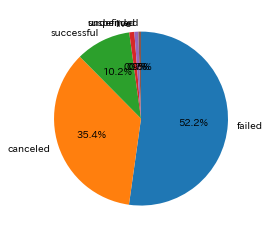

In [3]:
#目的変数とすべきstateの概観
labels = df['state'].unique()
state = df["state"].value_counts() 
state_rate = round(state / len(df["state"]) * 100,2)
print('プロジェクト成功の割合')
print(state_rate)
plt.pie(state, labels=labels,counterclock=False, startangle=90,autopct="%1.1f%%")

successful, failed, 以外にもstateが複数存在する。
とりあえず目的変数はsuccessful, failedとする。
(cancelなどの中にも目標額を到達したものがありそうなのでそれを考慮して目的変数を作るというのもあり？)

In [4]:
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')].copy()
category_labels=df['category'].unique()
main_category_labels = df['main_category'].unique()
currency_labels = df['currency'].unique()
country_labels = df['country'].unique()

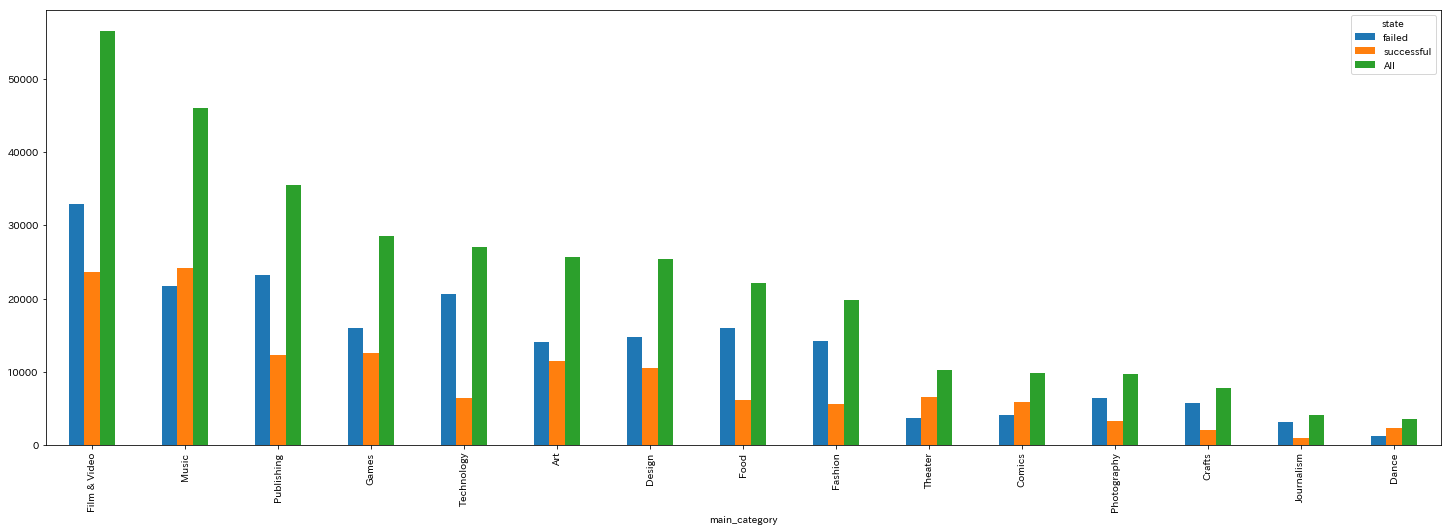

In [5]:
#pd.crosstab(df.main_category,df.state,margins=True).apply(lambda x: x/x.sum(), axis=1).plot(kind='bar',stacked=False,figsize=(20, 10))
main_category_crosstab = pd.crosstab(df.main_category,df.state,margins=True)
main_category_crosstab.sort_values(by='All',ascending=False).drop('All').plot(kind='bar',stacked=False,figsize=(25, 8))

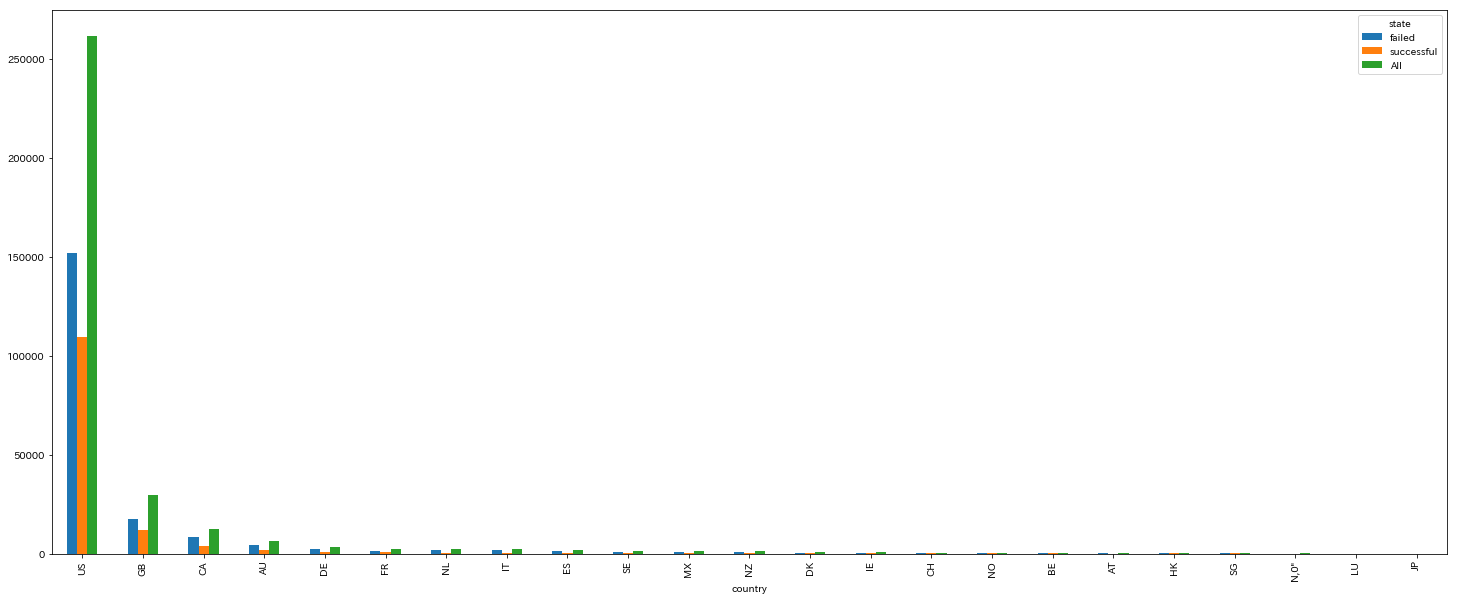

In [6]:
country_crosstab = pd.crosstab(df.country,df.state,margins=True)
country_crosstab.sort_values(by='All',ascending=False).drop('All').plot(kind='bar',stacked=False,figsize=(25, 10))

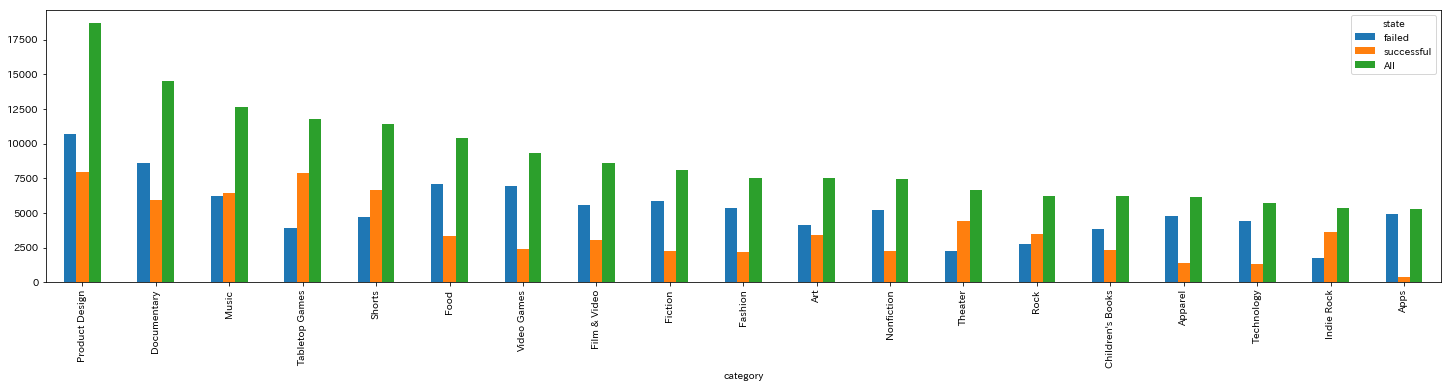

In [7]:
category_crosstab = pd.crosstab(df['category'],df.state,margins=True)
category_crosstab.sort_values(by='All',ascending=False)[:20].drop('All').plot(kind='bar',stacked=False,figsize=(25, 5))

In [8]:
category_crosstab.sort_values(by='All',ascending=False)[:10]

state,failed,successful,All
category,,,
All,197719,133956,331675
Product Design,10718,7962,18680
Documentary,8599,5924,14523
Music,6201,6432,12633
Tabletop Games,3878,7866,11744
Shorts,4721,6673,11394
Food,7119,3297,10416
Video Games,6942,2386,9328
Film & Video,5554,3070,8624


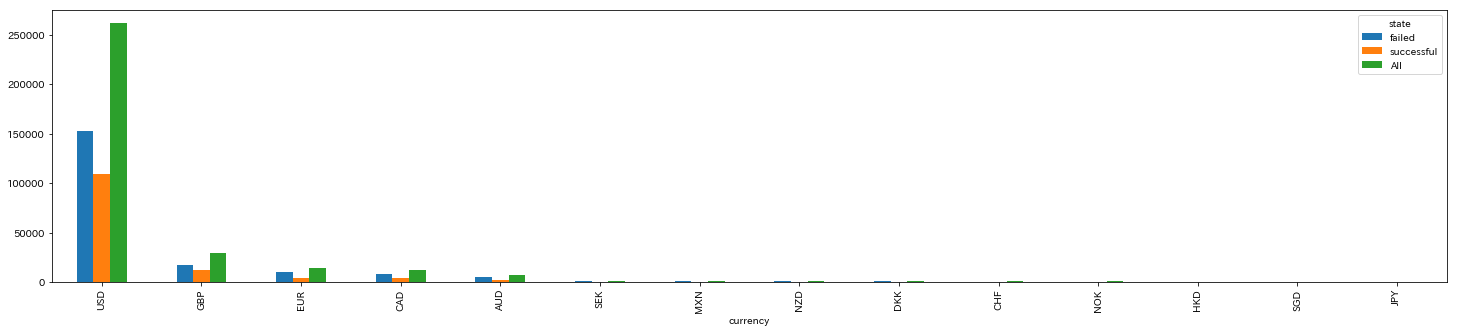

In [9]:
currency_crosstab = pd.crosstab(df.currency,df.state,margins=True)
currency_crosstab.sort_values(by='All',ascending=False).drop('All').plot(kind='bar',stacked=False,figsize=(25, 5))

## 説明変数確認

### 列名整理

id:id<br/>
name:プロジェクト名<br/>
category:サブカテゴリ<br/>
main_category:メインカテゴリ<br/>
currency:通貨（プロジェクト地域の通貨が表示されるっぽい）<br/>
deadline:調達期限<br/>
goal:目標最小金額<br/>
launched:プロジェクトローンチ日時（キックスターター開始日時）　<br/>
pledged:実際の調達額（usdベースではない予感) <font color="RED">調達額が事前に判明することはないので除外</font><br/>
state:プロジェクト成否　目的変数<br/>
backers:支持者数 <font color="RED">支持者数が事前に判明することはないので除外</font><br/>
country:国<br/>
usdpledged:USドルでの調達？ <font color="RED">調達額が事前に判明することはないので除外</font><br/>
usd_pledged_real:USDに引き直した調達額 <font color="RED">調達額が事前に判明することはないので除外</font><br/>
usd_goal_real:USDに引き直した目標金額

### 欠損値確認

In [10]:
print(df.shape)
print(len(df['ID']))
df.isnull().sum()

(331675, 15)
331675


ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

nameとusd　pledgedに欠損値。
name,idを説明変数にするのは困難なので除外。
goal,usd_goal_realは共に目標金額を表しており、<font color="Blue">usd_goal_real</font>がUSDで引き直した金額を示しているようなので、goalを説明変数から除外<br/>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b57b0f0>,
      dtype=object)

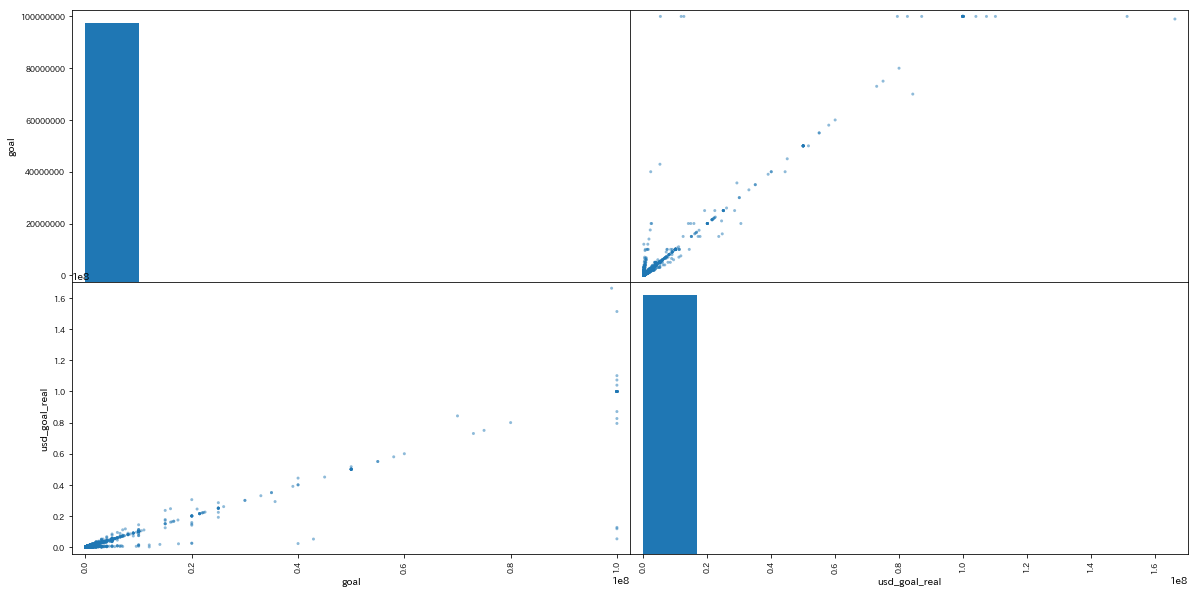

In [11]:
#一応散布図行列で確認 
df_goal = df[["goal","usd_goal_real"]]
pd.plotting.scatter_matrix(df_goal,figsize=(20,10))

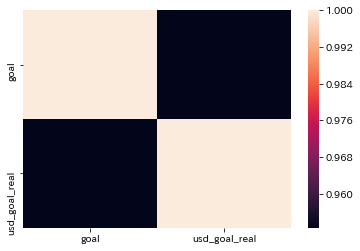

,goal,usd_goal_real
goal,1.000000,0.952614
usd_goal_real,0.952614,1.000000


In [12]:
#相関係数もついでに
sns.heatmap(df_goal.corr())
plt.show()
df_goal.corr()

ほぼ同様のデータを示しているようであるため除外することにしたが、無相関化するなどするべき？

## 説明変数を作成

category, 
main_category, 
currency, 
country
はカテゴリ変数のため、ダミー変換する必要がある。<br/>

In [20]:
explanatory_df = df.copy()

In [21]:
explanatory_df = explanatory_df.drop('ID',1)
explanatory_df = explanatory_df.drop('name', 1)
explanatory_df = explanatory_df.drop('pledged',1)
explanatory_df = explanatory_df.drop('usd pledged',1)
explanatory_df = explanatory_df.drop('usd_pledged_real',1)
explanatory_df = explanatory_df.drop('goal',1)
explanatory_df = explanatory_df.drop('backers',1)
#explanatory_df = explanatory_df.drop('category',1) #試しにcategoryをドロップしてみる
explanatory_df = explanatory_df.drop('country',1)#試しにcurrencyをドロップしてみる

deadline,launchedは日時データでそのまま使えないため、プロジェクトの期間(日数)として変換して変数化してみる。

In [22]:
explanatory_df['launched'] = pd.to_datetime(explanatory_df['launched'])
explanatory_df['deadline'] = pd.to_datetime(explanatory_df['deadline'])
explanatory_df['project_period'] = explanatory_df['deadline'].subtract(explanatory_df['launched'])
explanatory_df['project_period'] = explanatory_df['project_period'].astype('timedelta64[D]')
explanatory_df = explanatory_df.drop('launched',1)
explanatory_df = explanatory_df.drop('deadline',1)
explanatory_df['project_period'].head(3)


explanatory_df['usd_goal_real']=np.log(explanatory_df['usd_goal_real'])

category, main_category, currency, country はカテゴリ変数のため、ダミーへ変換

In [23]:
explanatory_df = pd.get_dummies(explanatory_df, columns = ['main_category'])
explanatory_df = pd.get_dummies(explanatory_df, columns = ['category'])
explanatory_df = pd.get_dummies(explanatory_df, columns = ['currency'])
#explanatory_df = pd.get_dummies(explanatory_df, columns = ['country'])

目的変数をラベル化

In [24]:
mapping_success = {'successful': 1, 'failed':0 }
explanatory_df['state'] = explanatory_df['state'].map(mapping_success)

In [25]:
explanatory_df.head(3)

,state,usd_goal_real,project_period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,7.335601,58.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,10.308953,59.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,10.714418,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
y = explanatory_df['state']
print(y.shape)
explanatory_df = explanatory_df.drop('state',1)


(331675,)


 ## 確率的勾配降下法で学習

### 確率的勾配降下法

In [27]:
#データをテスト用、訓練用に分割
X_train, X_test, y_train, y_test = train_test_split(explanatory_df, y, test_size=0.2, random_state=2234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(265340, 190) (265340,)
(66335, 190) (66335,)


In [33]:
#確率的勾配降下法
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=2234)
clf.fit(X_train, y_train)

/Users/kaoru/.pyenv/versions/3.6.7/envs/ml_lecture/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=2234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### ラベルを予測

In [34]:
# テストデータでラベルを予測
y_est = clf.predict(X_test)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test ,y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

対数尤度 = -11.296
正答率 = 67.296%


In [35]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = kickstarter失敗', '正解 = kickstarter成功'], 
                        columns=['予測 = kickstarter失敗', '予測 = kickstarter成功'])
conf_mat

,予測 = kickstarter失敗,予測 = kickstarter成功
正解 = kickstarter失敗,31797,7647
正解 = kickstarter成功,14047,12844


In [36]:
print('適合率:{:.3f}%'.format(100 * precision_score(y_test,y_est)))
print('再現率:{:.3f}%'.format(100 * recall_score(y_test,y_est)))
print('F値:{:.3f}%'.format(100 * f1_score(y_test,y_est)))

適合率:62.681%
再現率:47.763%
F値:54.215%


In [41]:
coeff_df = pd.DataFrame(explanatory_df.columns.delete(0))
coeff_df.columns = ['説明変数']
coeff_df["重み"] = pd.Series(clf.coef_[0])

coeff_df.sort_values(by='重み', ascending=False)[0:20]

,説明変数,重み
38,category_Civic Design,3.606557
98,category_Literary Journals,3.173260
139,category_Restaurants,2.874903
100,category_Live Games,2.172217
33,category_Candles,1.550716
153,category_Taxidermy,1.381375
23,category_Apparel,1.381247
149,category_Space Exploration,1.332328
53,category_Design,1.307367
161,category_Vegan,1.212795


### ロジスティック回帰

In [37]:
logisreg = LogisticRegression()
logisreg.fit(X_train, y_train)
logisreg_predict = logisreg.predict(X_test)
# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, logisreg_predict)))

/Users/kaoru/.pyenv/versions/3.6.7/envs/ml_lecture/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


正答率 = 67.305%


In [38]:
# 予測値と正解のクロス集計
LR_conf_mat = pd.DataFrame(confusion_matrix(y_test, logisreg_predict), 
                        index=['正解 = kickstarter失敗', '正解 = kickstarter成功'], 
                        columns=['予測 = kickstarter失敗', '予測 = kickstarter成功'])
LR_conf_mat

,予測 = kickstarter失敗,予測 = kickstarter成功
正解 = kickstarter失敗,31715,7729
正解 = kickstarter成功,13959,12932


In [39]:
print('適合率:{:.3f}%'.format(100 * precision_score(y_test,logisreg_predict)))
print('再現率:{:.3f}%'.format(100 * recall_score(y_test,logisreg_predict)))
print('F値:{:.3f}%'.format(100 * f1_score(y_test,logisreg_predict)))

適合率:62.591%
再現率:48.090%
F値:54.391%


In [40]:
LRcoeff_df = pd.DataFrame(explanatory_df.columns.delete(0))
LRcoeff_df.columns = ['説明変数']
LRcoeff_df["重み"] = pd.Series(logisreg.coef_[0])
LRcoeff_df.sort_values(by='重み', ascending=False)[0:20]

,説明変数,重み
98,category_Literary Journals,1.682063
33,category_Candles,1.422596
153,category_Taxidermy,1.390909
149,category_Space Exploration,1.264486
139,category_Restaurants,1.262737
100,category_Live Games,1.217738
38,category_Civic Design,1.178970
161,category_Vegan,1.098264
127,category_Print,1.048435
23,category_Apparel,0.994692


## 質問事項
#### ・説明変数の選び方についてこの方法で合っていますでしょうか<br/>・今回は説明変数からnameを除外しましたが、nameのようなものも説明変数に変換する方法があるのでしょうか。<br/>・正答率が想像していたよりもはるかに高いのですが、根本的に何か間違っていますでしょうか<br/>・pythonの記述でこうした方が良いという点ございましたらご意見お願いいたします。

